In [2]:
import cv2

In [3]:
import numpy as np

In [4]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=4550a671d72be4a4efe782b556d01ca50e7f9cd1954391d46e2ad1e7fa8208b8
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [27]:
!pwd

/content


In [28]:
import face_recognition as face_rec  #ชื่อเดิมคือ dlib จะอ่านไฟล์เป็น RGB

In [45]:
# กำหนดชื่อสมาชิกให้ตรงกับชื่อไฟล์
known_face_names = ["tvee", "anutin","Srettha"]

In [46]:
# face encodings ของสมาชิก
known_face_encodings = []
for known_face_name in known_face_names:
    directory = "/content/"
    image_path = directory+f"{known_face_name}.png"
    image = face_rec.load_image_file(image_path)
    face_encodings = face_rec.face_encodings(image)

    if len(face_encodings) > 0:
        known_face_encodings.append(face_encodings[0])
    else:
        print(f"No face found in {known_face_name}.png")

In [47]:
len(known_face_encodings)

3

In [48]:
known_face_encodings

[array([-0.01773544,  0.08960029,  0.02600221,  0.04474689, -0.07260902,
        -0.05290659, -0.06931344, -0.21159019,  0.08300804, -0.11286248,
         0.20729007, -0.08670907, -0.17728716, -0.09481788, -0.02510934,
         0.1915684 , -0.13145003, -0.16233279, -0.06865595, -0.07547487,
         0.02096322,  0.06655317,  0.01937924,  0.03932638,  0.01832206,
        -0.31454706, -0.12348799, -0.09456769,  0.07170226, -0.03610808,
        -0.1022601 ,  0.01301209, -0.18001743, -0.1239019 ,  0.110719  ,
         0.15929647, -0.08916855, -0.05697872,  0.14946318,  0.03193301,
        -0.10444284, -0.00828865,  0.05719771,  0.26723889,  0.14659086,
         0.09643678, -0.01687177, -0.05918857,  0.07511514, -0.24439356,
         0.07858608,  0.08034898,  0.15944777,  0.10324205,  0.07922838,
        -0.15835951,  0.05392161,  0.09548738, -0.1815156 ,  0.02515345,
         0.10173108, -0.11729255, -0.04163516, -0.01066213,  0.275051  ,
         0.16086254, -0.04169756, -0.14123347,  0.1

In [49]:
comsci_image = face_rec.load_image_file("/content/thai-gov.png")

In [50]:
face_locations = []
face_locations = face_rec.face_locations(comsci_image)

In [51]:
print(face_locations)
#location คือ y1,x2,y2, x1

[(211, 325, 340, 196), (202, 820, 356, 666), (355, 1071, 462, 963), (311, 540, 440, 411), (247, 127, 355, 20), (389, 642, 441, 590)]


In [52]:
len(face_locations)

6

In [53]:
face_encodings = []
face_encodings = face_rec.face_encodings(comsci_image, face_locations)

In [54]:
len(face_encodings) #เจอ  ใบหน้า

6

In [55]:
print(face_encodings)
#แสดงข้อมูลทั้ง ใบ หน้า

[array([-0.0671795 ,  0.08818883,  0.04684266,  0.00356149, -0.03980864,
       -0.01770553, -0.0188103 , -0.21425308,  0.0827592 , -0.05363882,
        0.28190407, -0.10651727, -0.15883598, -0.16156536, -0.08291708,
        0.1594682 , -0.17818198, -0.08826306, -0.11603862, -0.07788669,
       -0.00086399, -0.05691891,  0.05035883,  0.01901165, -0.02777781,
       -0.30157092, -0.12059576, -0.13339968,  0.13599661,  0.01988384,
       -0.06880799,  0.0144989 , -0.18598463, -0.08436875,  0.04764564,
        0.05560417, -0.06047741, -0.05215822,  0.16497098, -0.06757575,
       -0.13604361,  0.02376208,  0.06470428,  0.18945923,  0.18833376,
        0.06612156,  0.00124597, -0.09461023,  0.09570108, -0.17397559,
        0.0957    ,  0.14655459,  0.16224059,  0.03758407,  0.06970632,
       -0.07943001,  0.00956929,  0.17994937, -0.16363043, -0.00748715,
        0.07923098, -0.05143704, -0.06445269, -0.05876116,  0.16460121,
        0.1612224 , -0.07286677, -0.14401925,  0.16568148, -0.1

In [56]:
face_names=[]
face_percent=[]
for face_encoding in face_encodings:
  face_distances = face_rec.face_distance(known_face_encodings, face_encoding)
  #เปรียบเทียบหน้าเดิมที่เข้ารหัสกับใบหน้าที่อ่านจากภาพโดยการวัดระยะทาง ระยะทางสั้นสุดถือว่าเหมือนกันมากที่สุด
  best = np.argmin(face_distances)
  print(best)
  face_percent_value = 1-face_distances[best] # 1 ลบกับระยะที่สั้นที่สุด (เช่น 1-0.2 = 0.8 หมายถึงมั่นใจ 80%)
  print(face_percent_value)
  if face_percent_value >= 0.5:
    name = known_face_names[best]
    print(name)
    percent = round(face_percent_value*100,2)
    face_percent.append(percent)
  else:
    name = "UNKNOWN"
    face_percent.append(0)  #ไม่รู้ชื่อคนใส่ค่า % = 0
  face_names.append(name)

1
0.42623728382905735
2
0.9732109481304471
Srettha
0
0.9259885526458909
tvee
1
0.9626669885032862
anutin
1
0.4810265316676794
1
0.22217994866705182


In [57]:
print(face_names)

['UNKNOWN', 'Srettha', 'tvee', 'anutin', 'UNKNOWN', 'UNKNOWN']


In [58]:
for (y1,x2,y2, x1), name in zip(face_locations, face_names): # วนไปเป็นคู่ ๆ
  cv2.rectangle(comsci_image, (x1,y1), (x2,y2), (0,255,0), 2)
  cv2.putText(comsci_image, name, (x1, y1-6),cv2.FONT_HERSHEY_SIMPLEX , 0.6, (255,255,255), 1)

In [59]:
from google.colab.patches import cv2_imshow

In [60]:
comsci_image = cv2.cvtColor(comsci_image,cv2.COLOR_RGB2BGR)
#แปลงสี

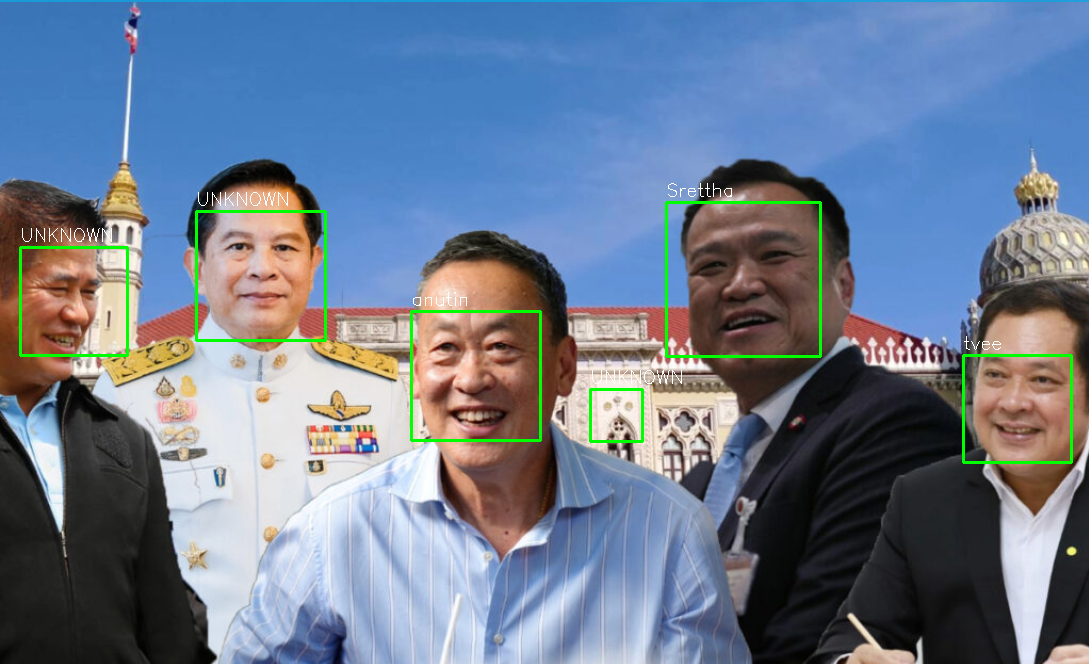

In [61]:
cv2_imshow(comsci_image)